<a href="https://colab.research.google.com/github/Luffy-0-3/Flight_price_prediction/blob/main/Flight_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing **LLibraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as  sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor

**Loading the dataset**

In [2]:
flight_data = pd.read_csv("/content/Flight_dataset.csv")

In [3]:
flight_data.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [4]:
flight_data.tail()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
300148,300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585
300152,300152,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,81585


In [5]:
flight_data.shape

(300153, 12)

**Data Preprocessing**

In [6]:
#checking the info of the  dataset
flight_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB


In [7]:
#statistical measure of the  dataset
flight_data.describe()

,Unnamed: 0,duration,days_left,price
count,300153.000000,300153.000000,300153.000000,300153.000000
mean,150076.000000,12.221021,26.004751,20889.660523
std,86646.852011,7.191997,13.561004,22697.767366
min,0.000000,0.830000,1.000000,1105.000000
25%,75038.000000,6.830000,15.000000,4783.000000
50%,150076.000000,11.250000,26.000000,7425.000000
75%,225114.000000,16.170000,38.000000,42521.000000
max,300152.000000,49.830000,49.000000,123071.000000


In [8]:
flight_data = flight_data.drop("Unnamed: 0",axis=1)

In [9]:
flight_data.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
300148,False
300149,False
300150,False
300151,False


In [10]:
# Check for duplicate rows across all columns
duplicate_rows = flight_data[flight_data.duplicated()]
print("Number of duplicate rows across all columns:", len(duplicate_rows))
print("Duplicate rows:")
display(duplicate_rows)

Number of duplicate rows across all columns: 0
Duplicate rows:


,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price


In [11]:
#checking the null values of  the dataset
flight_data.isnull().sum()

,0
airline,0
flight,0
source_city,0
departure_time,0
stops,0
arrival_time,0
destination_city,0
class,0
duration,0
days_left,0


In [12]:
flight_data.dropna(inplace=True)

In [13]:
#checking the null values of  the dataset after removing null values
flight_data.isnull().sum()

,0
airline,0
flight,0
source_city,0
departure_time,0
stops,0
arrival_time,0
destination_city,0
class,0
duration,0
days_left,0


In [14]:
#head of the  dataset after  removing null values and removing a column
flight_data.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [15]:
#checking  the  unique values in each column

columns = ["airline","flight","source_city","departure_time","stops","arrival_time","destination_city","class"]
for col in columns:
  val = flight_data[col].value_counts()
  print(val)

airline
Vistara      127859
Air_India     80892
Indigo        43120
GO_FIRST      23173
AirAsia       16098
SpiceJet       9011
Name: count, dtype: int64
flight
UK-706     3235
UK-772     2741
UK-720     2650
UK-836     2542
UK-822     2468
           ... 
6E-2914       1
G8-107        1
SG-9974       1
6E-865        1
SG-8339       1
Name: count, Length: 1561, dtype: int64
source_city
Delhi        61343
Mumbai       60896
Bangalore    52061
Kolkata      46347
Hyderabad    40806
Chennai      38700
Name: count, dtype: int64
departure_time
Morning          71146
Early_Morning    66790
Evening          65102
Night            48015
Afternoon        47794
Late_Night        1306
Name: count, dtype: int64
stops
one            250863
zero            36004
two_or_more     13286
Name: count, dtype: int64
arrival_time
Night            91538
Evening          78323
Morning          62735
Afternoon        38139
Early_Morning    15417
Late_Night       14001
Name: count, dtype: int64
destination_city


<Axes: xlabel='price', ylabel='flight'>

/usr/local/lib/python3.12/dist-packages/IPython/core/events.py:89: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


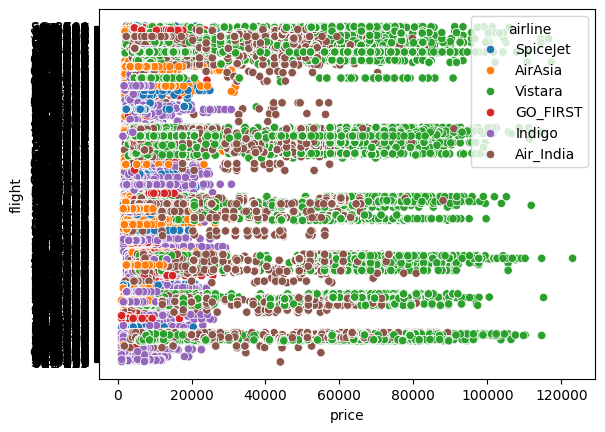

In [16]:
#visualizing the data
sns.scatterplot(data=flight_data,y="flight",x="price",hue="airline")

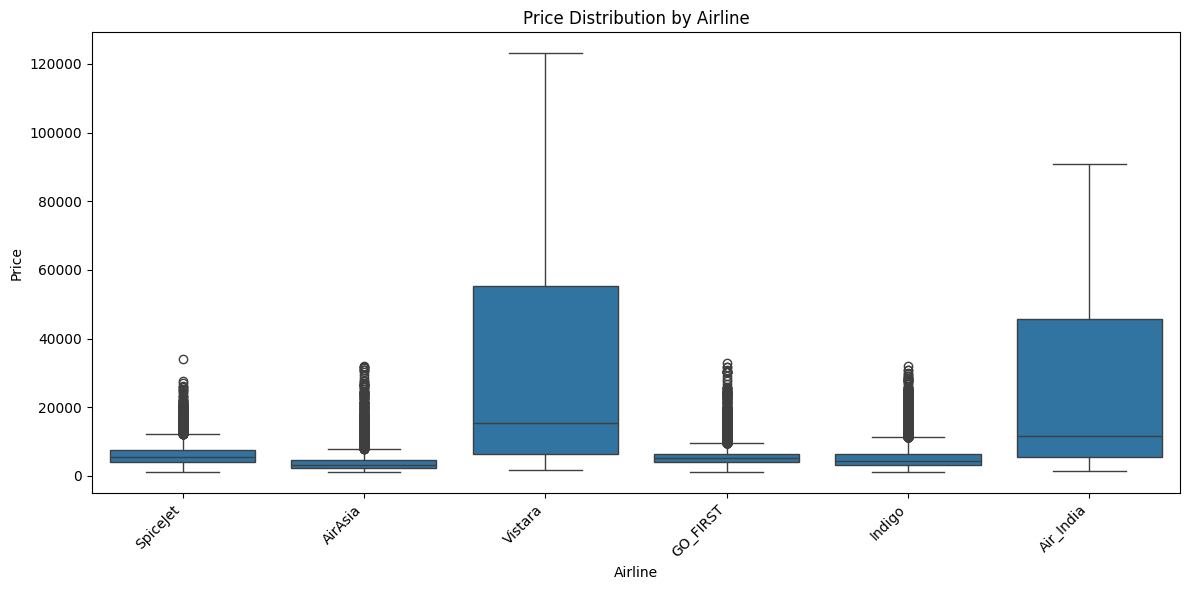

In [17]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='airline', y='price', data=flight_data)
plt.title('Price Distribution by Airline')
plt.xlabel('Airline')
plt.ylabel('Price')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [18]:
Q1 = flight_data['price'].quantile(0.25)
Q3 = flight_data['price'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = flight_data[(flight_data['price'] < lower_bound) | (flight_data['price'] > upper_bound)]

print("Number of outliers in 'price' column:", len(outliers))
print("Outliers:")
display(outliers.head(8))


Number of outliers in 'price' column: 123
Outliers:


,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
215858,Vistara,UK-809,Delhi,Evening,two_or_more,Evening,Kolkata,Business,21.08,1,114434
215859,Vistara,UK-809,Delhi,Evening,two_or_more,Evening,Kolkata,Business,21.08,1,116562
216025,Vistara,UK-817,Delhi,Evening,two_or_more,Morning,Kolkata,Business,17.58,4,100395
216094,Vistara,UK-995,Delhi,Morning,one,Evening,Kolkata,Business,6.50,5,99129
216095,Vistara,UK-963,Delhi,Morning,one,Evening,Kolkata,Business,8.00,5,101369
216096,Vistara,UK-811,Delhi,Early_Morning,two_or_more,Evening,Kolkata,Business,10.92,5,117307
216167,Vistara,UK-927,Delhi,Morning,one,Evening,Kolkata,Business,7.33,6,105961
216307,Vistara,UK-811,Delhi,Early_Morning,two_or_more,Evening,Kolkata,Business,10.92,8,102114


In [19]:
flight_data = flight_data.drop(outliers.index, axis=0)

In [20]:
Q1 = flight_data['price'].quantile(0.25)
Q3 = flight_data['price'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = flight_data[(flight_data['price'] < lower_bound) | (flight_data['price'] > upper_bound)]

print("Number of outliers in 'price' column:", len(outliers))
print("Outliers:")

Number of outliers in 'price' column: 0
Outliers:


In [21]:
flight_data.shape

(300030, 11)

In [22]:
encoder = LabelEncoder()
columns = ["airline","flight","source_city","departure_time","stops","arrival_time","destination_city","class"]
for col in columns:
  flight_data[col]=encoder.fit_transform(flight_data[col])


In [23]:
#checking the dataset after LabelEncoding
flight_data.head(5)

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,4,1408,2,2,2,5,5,1,2.17,1,5953
1,4,1387,2,1,2,4,5,1,2.33,1,5953
2,0,1213,2,1,2,1,5,1,2.17,1,5956
3,5,1559,2,4,2,0,5,1,2.25,1,5955
4,5,1549,2,4,2,4,5,1,2.33,1,5955


**Spliting into features**

In [24]:
#spliting the data into features and target
X = flight_data.drop("price",axis=1)
y=flight_data["price"]

**Holdout Validation**

In [25]:
#splitting the data into training and testing
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=3,test_size=0.3)

In [26]:
X_train.shape,X_test.shape

((210021, 10), (90009, 10))

**Validation Techniques**

In [27]:
#using  validation techniques on Linear Regression
from sklearn.model_selection import KFold
model = LinearRegression()
KFold_validation = KFold(5)
#cheching the  accuracy
from sklearn.model_selection import cross_val_score
results = cross_val_score(model,X,y,cv=KFold_validation)
print(results)


[-0.20405195 -0.20406302 -0.15236765  0.84036924  0.07445869]


In [28]:
#using  validation techniques on Random Forest
model = RandomForestRegressor(random_state=3)
kfold_validation = KFold(5)
results = cross_val_score(model,X,y,cv=kfold_validation)
print(results)

[0.4959633  0.5743115  0.59913811 0.90174002 0.21222599]


**Training the model Linear regression**

In [29]:
#training the model
model = LinearRegression()

In [30]:
model.fit(X_train,y_train)

LinearRegression()

**Accuracy of the  Linear Regression**

In [31]:
from sklearn.metrics import r2_score

# Calculate R-squared on the training data
y_train_pred = model.predict(X_train)
train_acc = r2_score(y_train, y_train_pred)
print(f"R-squared on training data: {train_acc}")

# Calculate R-squared on the testing data
y_test_pred = model.predict(X_test)
test_acc = r2_score(y_test, y_test_pred)
print(f"R-squared on testing data: {test_acc}")

R-squared on training data: 0.9058782858765311
R-squared on testing data: 0.9062237267239223


**Training the Random Forest Regression**

In [32]:
#Random Forest Model
rf_model = RandomForestRegressor()
rf_model.fit(X_train,y_train)

RandomForestRegressor()

**Accuracy of the Random Forest Regression**

In [33]:
#checking the acccuracy for training data
X_train_pred = rf_model.predict(X_train)
train_acc = r2_score(X_train_pred,y_train)
print(f"R-squared on training data: {train_acc}")

#checking acc for testing data
X_test_pred = rf_model.predict(X_test)
test_acc = r2_score(X_test_pred,y_test)
print(f"R-squared on training data: {test_acc}")

R-squared on training data: 0.998493388772572
R-squared on training data: 0.989542327005766
